Mini Project 1 To get the Data

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path="/content/drive/MyDrive/dataset/corona_tested_individuals_ver_0083.english.csv"
data_set=pd.read_csv(path)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data_set.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [5]:
cols=[]
for i in range(1,9):
  cols.append(i)

In [6]:
data_set=data_set[data_set.columns[cols]]
data_set.head()


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0,0,0,0,0,negative,No,male
1,0,1,0,0,0,negative,No,male
2,0,0,0,0,0,negative,Yes,female
3,0,0,0,0,0,negative,No,male
4,0,1,0,0,0,negative,No,male


In [7]:
len(data_set)

2742596

In [8]:
def determine_result(res):
  return 1 if res=="positive" else 0
def determine_age(res):
  return 1 if res=="Yes" else 0
def determine_gender(res):
  return 1 if res=="male" else 0

data=[]
for i in range(1000):
  curr=[]
  s=data_set.iloc[i].copy()
  if (s["corona_result"] in ["positive","negative"]) and (s["age_60_and_above"] in ["Yes","No"]) and (s["gender"] in ["male","female"]):
    s["corona_result"]=determine_result(s["corona_result"])
    s["age_60_and_above"]=determine_age(s["age_60_and_above"])
    s["gender"]=determine_gender(s["gender"])
    for j in s:
      curr.append(j)
  data.append(curr)

In [9]:
len(data)

1000

Mini project 2 To process the Data

In [10]:
training_data_set=pd.DataFrame(data,columns=["cough","fever","sore_throat","shortness_of_breath","head_ache","corona_result","age_60_and_above","gender"])
training_data_set

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [11]:
rows_with_NaN=training_data_set.isnull().any(axis=1)
rows=training_data_set[rows_with_NaN]
r=list(rows.index)

if r!=[]:
  training_data_set.drop(training_data_set.index[r],inplace=True)

In [12]:
y_data=training_data_set["corona_result"]
x_data=training_data_set.drop("corona_result",axis=1)
x_data

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
norm_data=StandardScaler().fit_transform(x_data)

norm_x_dataframe=pd.DataFrame(norm_data,columns=["cough","fever","sore_throat","shortness_of_breath","head_ache","age_60_and_above","gender"])

Mini project 3 Apply the PCA analysis and then finally train the model

In [14]:
pca=PCA(n_components=1)
pca_data=pca.fit_transform(x_data)
pca_dataset=pd.DataFrame(pca_data,columns=["PCA-1"])
pca_dataset

,PCA-1
0,0.527130
1,0.536089
2,-0.400462
3,0.527130
4,0.536089
...,...
992,-0.470355
993,-0.470355
994,-0.470355
995,0.527130


In [15]:
pca.explained_variance_ratio_

array([0.5763238])

In [16]:
print(pca)

PCA(n_components=1)


In [17]:
x_data=pca_dataset

In [18]:
def convert_data_type_to_tensor(res):
  return tf.convert_to_tensor(np.array(res,dtype=float))


seed=42
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=seed)

In [19]:
def count_total(y):
  c=[0,0]
  for i in y:
    if(i==0):
      c[0]+=1
    else:
      c[1]+=1
  return c


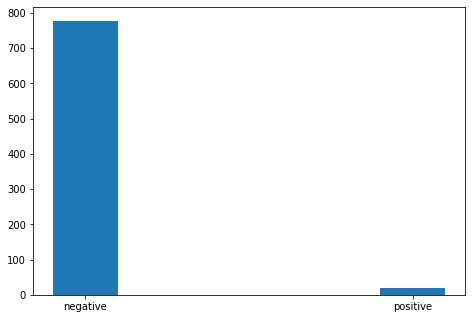

In [20]:
#calculating percentage of People Are positive and negative of Covid 19

figure=plt.figure()
ax=figure.add_axes([0,0,1,1])

p_n=count_total(y_train)

ax.bar(["negative","positive"],p_n,0.2)
plt.show();

In [21]:
X_train=convert_data_type_to_tensor(X_train)
X_test=convert_data_type_to_tensor(X_test)
y_train=convert_data_type_to_tensor(y_train)
y_test=convert_data_type_to_tensor(y_test)
y_test

<tf.Tensor: shape=(200,), dtype=float64, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>

In [37]:

model=tf.keras.Sequential([tf.keras.layers.Dense(1,activation="sigmoid")])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(0.1), metrics=["accuracy"])
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 0.3486 - accuracy: 0.9097 - val_loss: 0.1657 - val_accuracy: 0.9750
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1329 - accuracy: 0.9762 - val_loss: 0.1228 - val_accuracy: 0.9750
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1166 - accuracy: 0.9762 - val_loss: 0.1166 - val_accuracy: 0.9750
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1138 - accuracy: 0.9762 - val_loss: 0.1147 - val_accuracy: 0.9750
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1132 - accuracy: 0.9762 - val_loss: 0.1144 - val_accuracy: 0.9750
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1128 - accuracy: 0.9762 - val_loss: 0.1155 - val_accuracy: 0.9750
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1132 - accuracy: 0.9762 - val_loss: 0.1157 - val_accuracy: 0.9750
Epoch 8/100


In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [39]:
y_pred=model.predict(X_test).ravel()


In [40]:
y_test

<tf.Tensor: shape=(200,), dtype=float64, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>

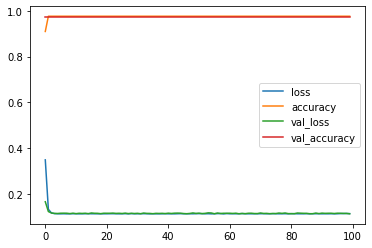

In [41]:
#plot the graph Loss vs Accuracy cuve
pd.DataFrame(history.history).plot()
plt.show()

In [27]:
a=tf.constant([[1]])
h=model.predict(a)
h

array([[0.01840597]], dtype=float32)

In [28]:
from sklearn import metrics

a=y_test.numpy()
b=y_pred
c=[]
for i in range(len(b)):
  if(b[i]>=0.5):
    c.append(1)
  else:
    c.append(0)
c=np.array(c)
cm=metrics.confusion_matrix(a,c)
cm

array([[195,   0],
       [  5,   0]])

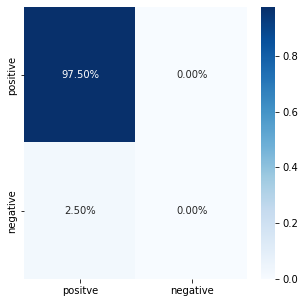

In [31]:
import seaborn as sn
cm_df=pd.DataFrame(cm,index=[i for i in ["positive","negative"]],columns=[i for i in ["positve","negative"]])
plt.figure(figsize=(5,5))
sn.heatmap(cm_df/np.sum(cm),annot=True,fmt='.2%',cmap="Blues")

In [32]:
e,f,g=metrics.roc_curve(y_test,y_pred)

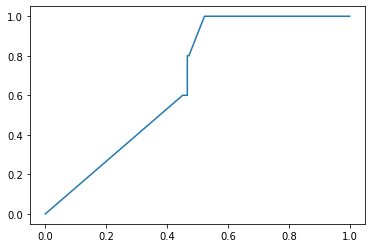

In [33]:
plt.plot(e,f)

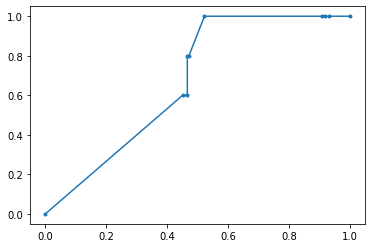

In [34]:
au=metrics.auc(e,f)
plt.plot(e,f,marker='.')

CONCLUSION
The following data Has lot of noises which increases the chances of model being Biased Towards Positive there fore this Data is not fit to Classification 